<a href="https://colab.research.google.com/github/itsirfan/Data-Science-And-Machine-Learning-Projects-/blob/main/Project_1_Automated_Data_Cleaning_and_Exploratory_Data_Analysis_on_the_Penguins_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# University Of Birmingham - Python Project 1

In this project, I built an automated data cleaning and exploratory data analysis (EDA) tool in Python. The code loads the penguins dataset, cleans missing values, flags outliers, and generates visualisations such as a correlation heatmap, histogram, bar chart, and missing data matrix. All results are saved automatically for analysis.

In [ ]:
!pip install missingno seaborn

In [ ]:
In this section, I am installing the required Python libraries and setting up a folder where all my analysis outputs will be saved. These libraries allow me to clean the data, analyse it, and generate visual charts for the project.

In [ ]:
from pathlib import Path
OUTPUT_DIR = Path("task1_outputs")
OUTPUT_DIR.mkdir(exist_ok=True)


In this part, I import all the Python libraries needed for my data cleaning and analysis. These libraries allow me to work with data, create visualisations, calculate correlations, and generate the EDA outputs. I also load the Penguins dataset here, which will be used for the analysis in this project.

Task 1 complete. Outputs saved in: task1_outputs


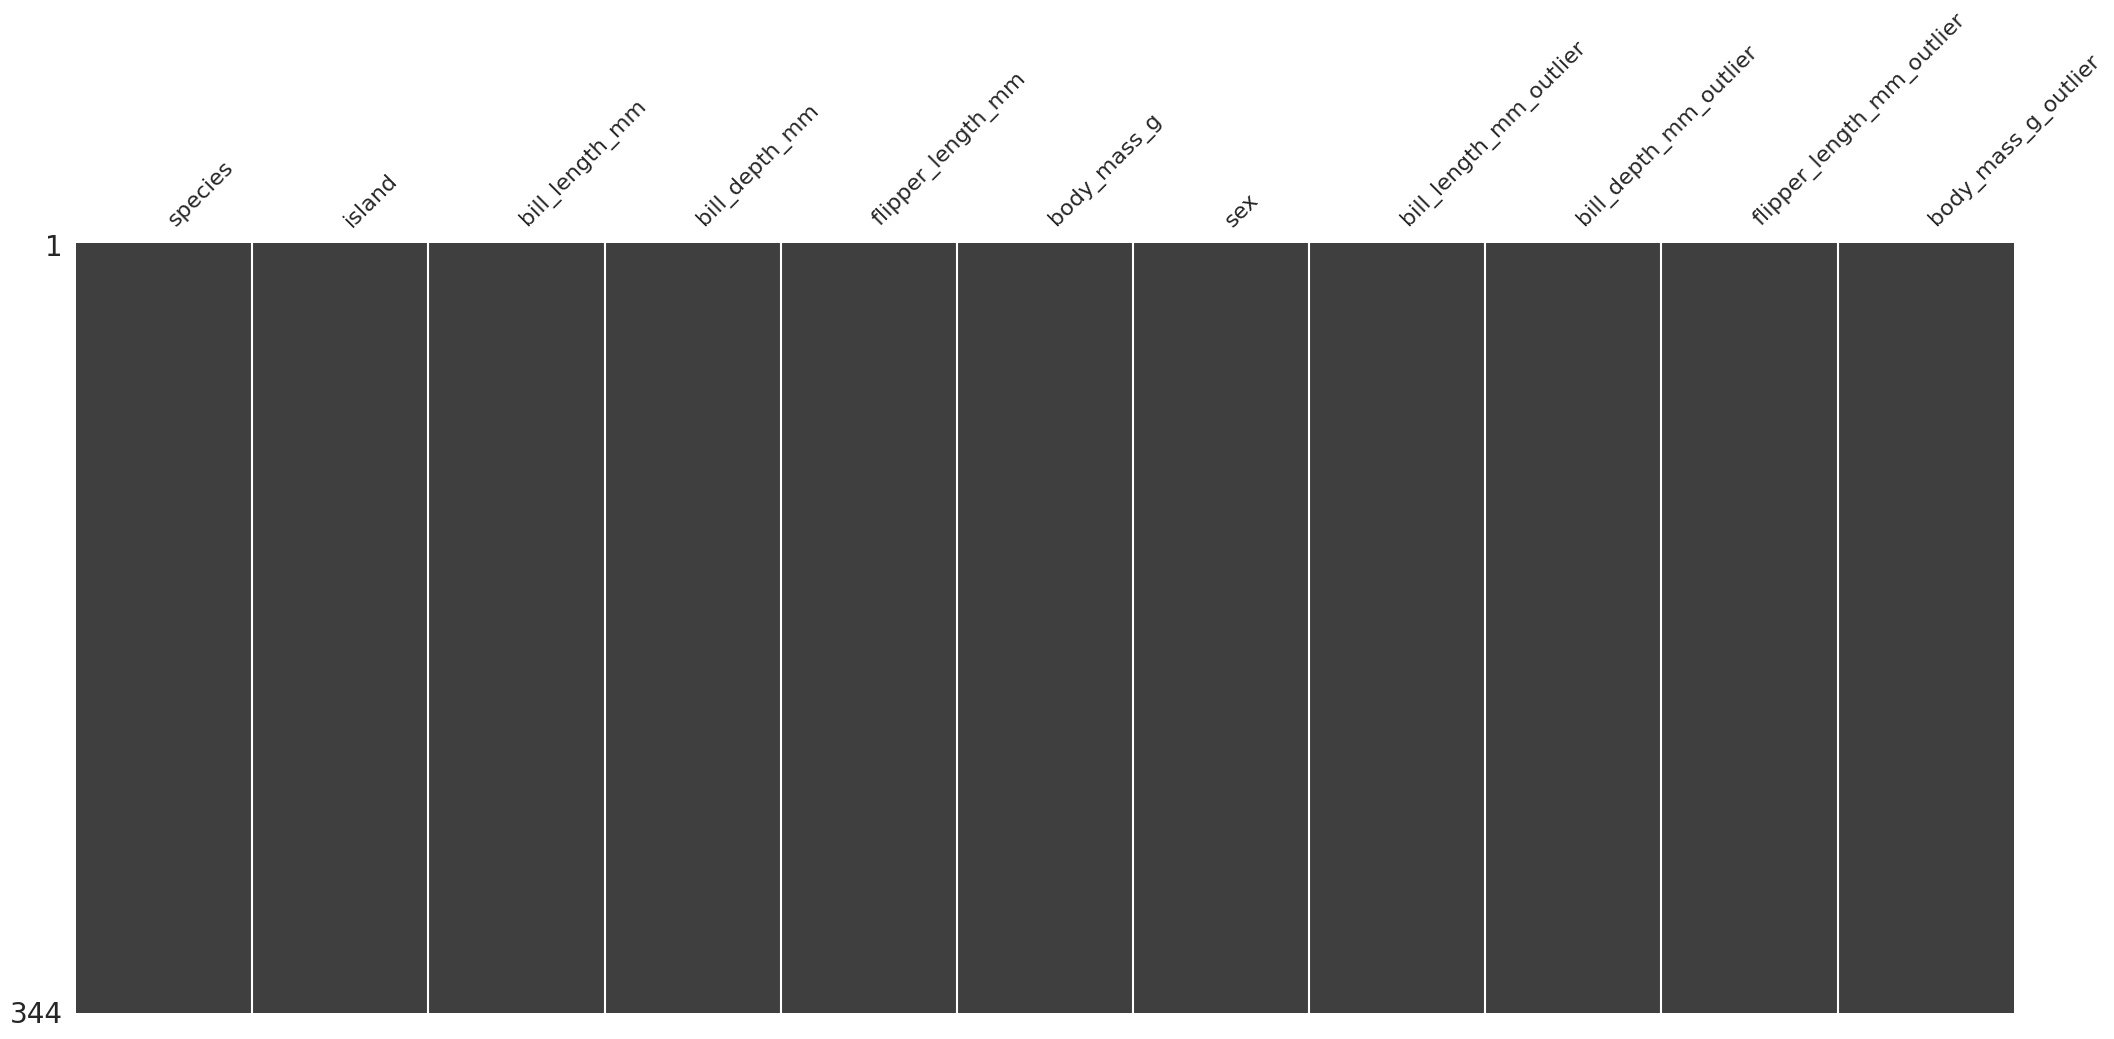

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from pathlib import Path

sns.set(style="whitegrid")

OUTPUT_DIR = Path("task1_outputs")
OUTPUT_DIR.mkdir(exist_ok=True)

def load_data(path=None):
    if path:
        return pd.read_csv(path)
    return sns.load_dataset("penguins").copy()


def convert_dtypes(df):
    return df.copy()


def get_missing_report(df):
    miss_pct = df.isna().mean().round(4) * 100
    return pd.DataFrame({"missing_pct": miss_pct, "dtype": df.dtypes.astype(str)})


def auto_fill(df):
    df = df.copy()
    for col in df.columns:
        if df[col].isna().sum() == 0:
            continue
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode().iloc[0])
    return df


def flag_outliers(df):
    df = df.copy()
    numeric = df.select_dtypes(include=[np.number]).columns.tolist()
    for col in numeric:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        df[col+"_outlier"] = (df[col] < lower) | (df[col] > upper)
    return df


def clean_df(df):
    before = get_missing_report(df)
    df = convert_dtypes(df)
    df = auto_fill(df)
    df = flag_outliers(df)
    after = get_missing_report(df)
    return df, before, after


def save_missing_matrix(df, outpath):
    fig = plt.figure(figsize=(6,4))
    msno.matrix(df, sparkline=False)
    plt.savefig(outpath)
    plt.close(fig)


def generate_eda_report(df, outdir=OUTPUT_DIR, key_numeric=None, key_category=None):
    numeric = df.select_dtypes(include=[np.number]).columns.tolist()
    category = df.select_dtypes(include=["object","category"]).columns.tolist()

    if not key_numeric and numeric:
        key_numeric = numeric[0]
    if not key_category and category:
        key_category = category[0]

    df.describe(include="all").transpose().to_csv(outdir/"describe.csv")

    if len(numeric) >= 2:
        plt.figure(figsize=(8,6))
        sns.heatmap(df[numeric].corr(), annot=True, fmt=".2f")
        plt.title("Correlation Matrix")
        plt.savefig(outdir/"correlation.png")
        plt.close()

    if key_numeric:
        plt.figure()
        sns.histplot(df[key_numeric].dropna(), kde=True)
        plt.title(f"Histogram of {key_numeric}")
        plt.savefig(outdir/f"hist_{key_numeric}.png")
        plt.close()

    if key_category:
        plt.figure()
        sns.countplot(y=key_category, data=df)
        plt.title(f"Category Count: {key_category}")
        plt.savefig(outdir/f"bar_{key_category}.png")
        plt.close()

    save_missing_matrix(df, outdir/"missing_matrix.png")

    insights = []
    if len(numeric) >= 2:
        corr = df[numeric].corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
        strongest = corr[corr < 1].head(3)
        for (a,b), val in strongest.items():
            insights.append(f"{a} and {b} correlation: {val:.2f}")
    if category:
        top = df[category[0]].value_counts().head(3)
        insights.append("Top categories: " + ", ".join([f"{i} ({c})" for i,c in top.items()]))

    with open(outdir/"insights.txt", "w") as f:
        for line in insights:
            f.write(line + "\n")



df = load_data()
df_clean, before, after = clean_df(df)

before.to_csv(OUTPUT_DIR/"missing_before.csv")
after.to_csv(OUTPUT_DIR/"missing_after.csv")

generate_eda_report(df_clean)

print("Task 1 complete. Outputs saved in:", OUTPUT_DIR)


This cell displays the cleaned version of the Penguins dataset after missing values were filled and outliers were flagged. The dark background appears because Colab is in dark mode, but it simply shows the rows and columns of the cleaned data.

In [ ]:
!ls -lah task1_outputs


total 156K
drwxr-xr-x 2 root root 4.0K Dec  9 19:03 .
drwxr-xr-x 1 root root 4.0K Dec  9 19:02 ..
-rw-r--r-- 1 root root  15K Dec  9 19:04 bar_species.png
-rw-r--r-- 1 root root  37K Dec  9 19:04 correlation.png
-rw-r--r-- 1 root root  682 Dec  9 19:04 describe.csv
-rw-r--r-- 1 root root  29K Dec  9 19:04 hist_bill_length_mm.png
-rw-r--r-- 1 root root  215 Dec  9 19:04 insights.txt
-rw-r--r-- 1 root root  305 Dec  9 19:04 missing_after.csv
-rw-r--r-- 1 root root  182 Dec  9 19:04 missing_before.csv
-rw-r--r-- 1 root root  44K Dec  9 19:04 missing_matrix.png


In this section, I am displaying the visual outputs generated by my automated EDA code. These charts include the correlation matrix, histogram, species count chart, and the missing data matrix. They show the results of the cleaning and analysis performed on the Penguins dataset and are saved in the task1_outputs folder for use in my assignment.

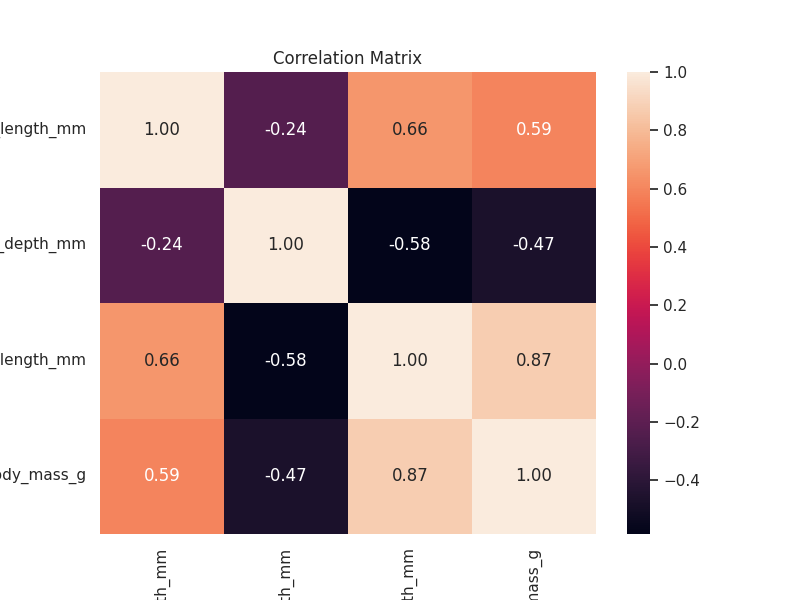

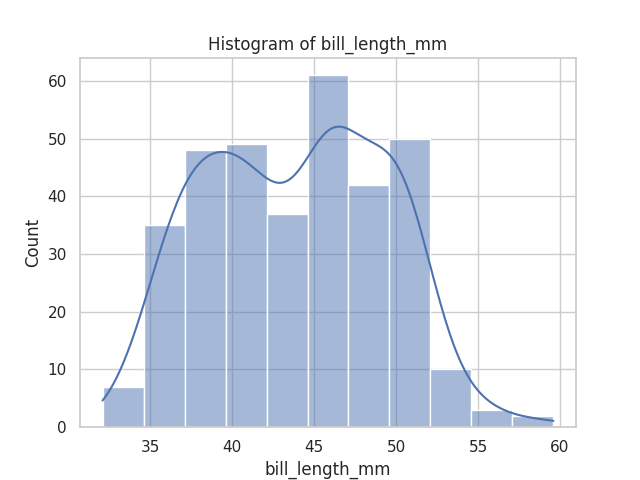

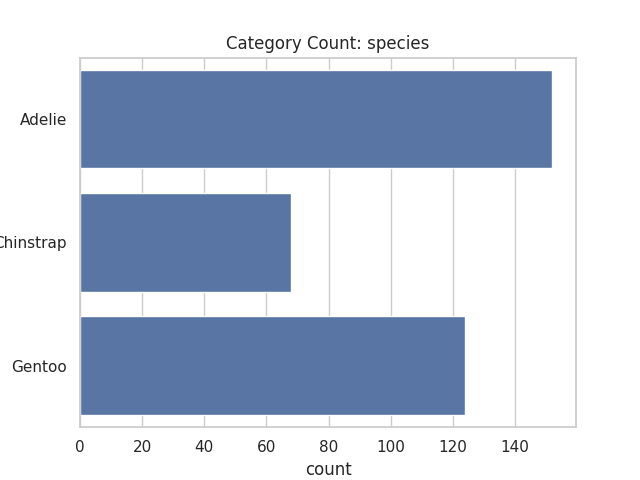

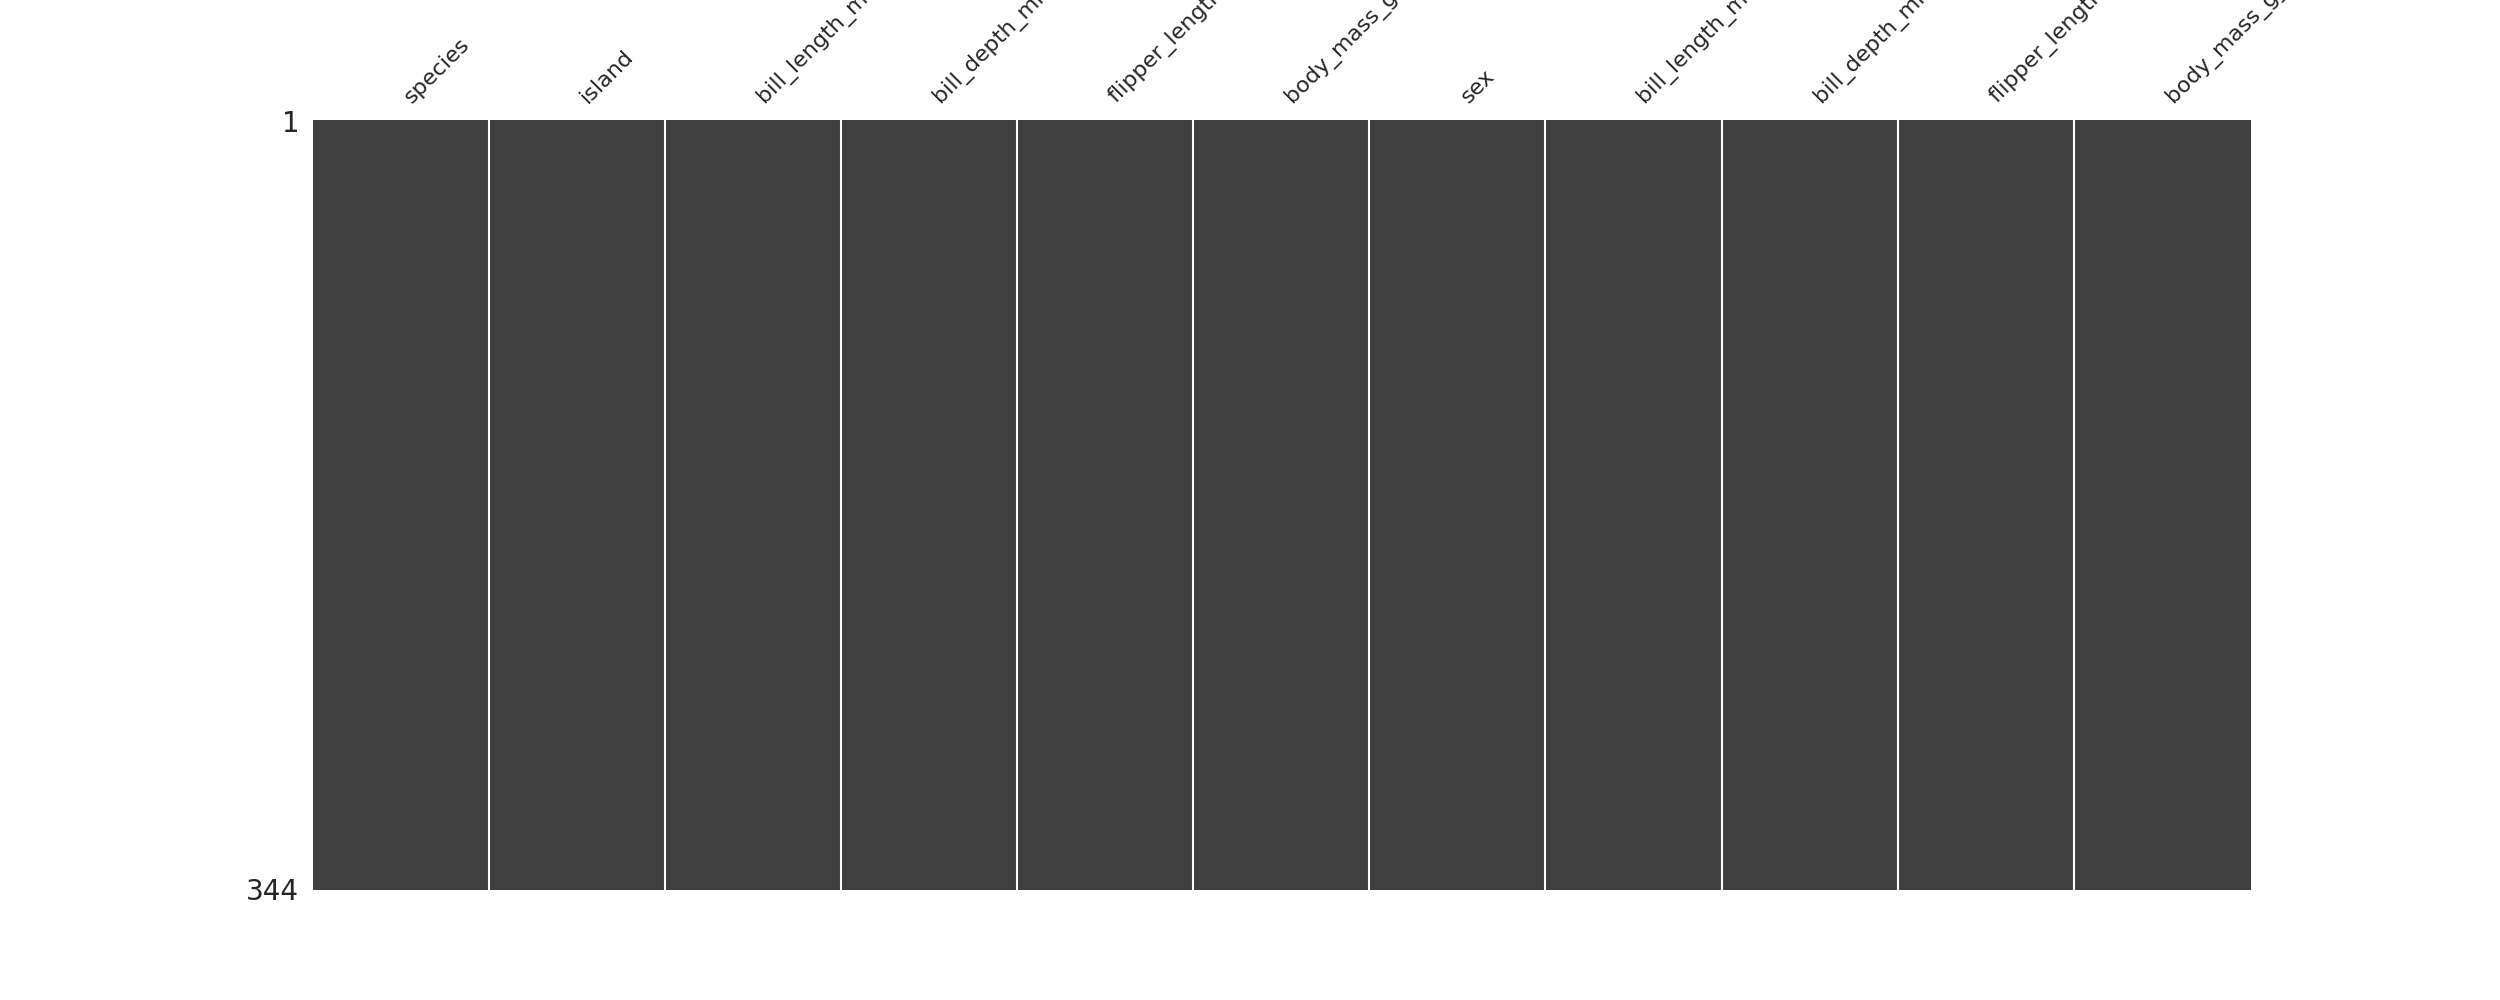

In [ ]:
from IPython.display import Image, display

display(Image("task1_outputs/correlation.png"))
display(Image("task1_outputs/hist_bill_length_mm.png"))
display(Image("task1_outputs/bar_species.png"))
display(Image("task1_outputs/missing_matrix.png"))


In this section, I display the visual outputs that were generated by my automated EDA process. These include the correlation heatmap, histogram, species count chart, and the missing data matrix. Showing these images helps me demonstrate the results of the data cleaning and analysis performed on the Penguins dataset.